Example use of PyDSTool
Install: pip3 install PyDSTool

In [1]:
import PyDSTool as dst
import numpy as np
from matplotlib import pyplot as plt

In [7]:
# name
DSargs = dst.args(name='AMOC')
# parameters
DSargs.pars = { 'mus': 6.25,
                'F': 1.1  }
# rhs of the differential equation
DSargs.varspecs = {'y': 'F - y*(1 + mus*(1-y)**2)'}
# initial conditions
DSargs.ics      = {'y': 1.5}

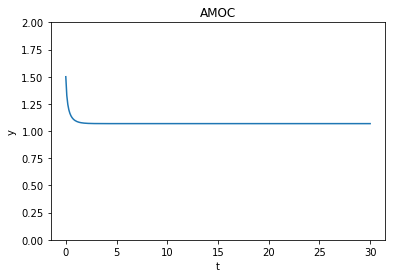

In [9]:
DSargs.tdomain = [0,30]                         # set the range of integration.
ode  = dst.Generator.Vode_ODEsystem(DSargs)     # an instance of the 'Generator' class.
traj = ode.compute('polarization')              # integrate ODE
pts  = traj.sample(dt=0.1)                      # Data for plotting

# PyPlot commands
plt.plot(pts['t'], pts['y'])
plt.xlabel('t')                                 
plt.ylabel('y')                                
plt.ylim([0,2])                                 
plt.title(ode.name)                             
plt.show()

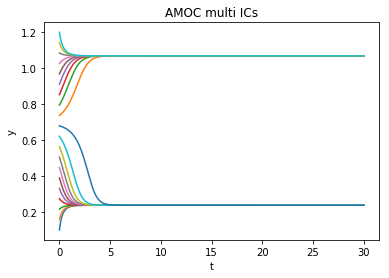

In [10]:
plt.clf()                                                                     
for i, y0 in enumerate(np.linspace(0.1,1.2,20)):
    ode.set( ics = { 'y': y0 } )                # Initial condition
    tmp = ode.compute('pol%3i' % i).sample()    
    plt.plot(tmp['t'], tmp['y'])
plt.xlabel('t')
plt.ylabel('y')
plt.title(ode.name + ' multi ICs')
plt.show()

LP Point found 
LP Point found 


/Users/dijkstra1_henk/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Bifurcation diagram AMOC')

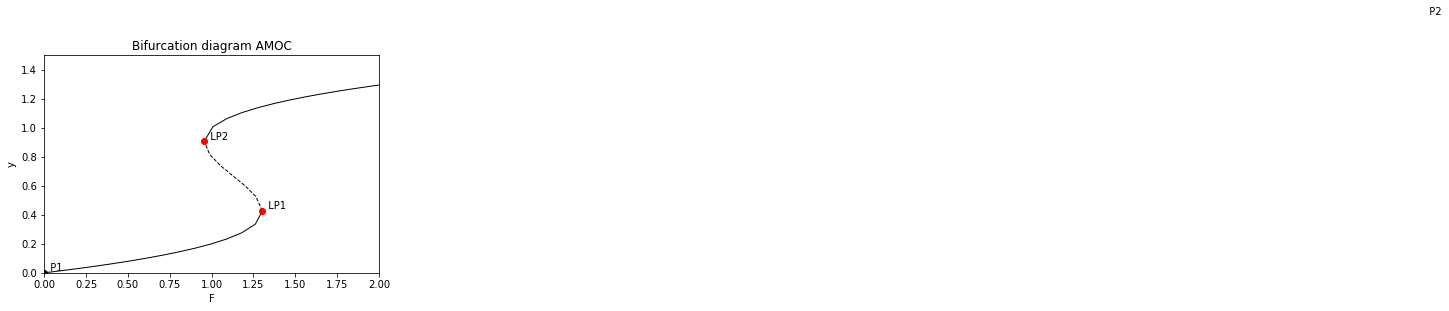

In [11]:
# Prepare the system to start close to a steady state
ode.set(pars = {'F': 0} )       # Lower bound of the control parameter 
ode.set(ics =  {'y': 0} )       # Close to one of the steady states present for this parameter

PC = dst.ContClass(ode)         # Set up continuation class

PCargs = dst.args(name='EQ1', type='EP-C')     # 'EP-C' stands for Equilibrium Point Curve. The branch will be labeled 'EQ1'.
PCargs.freepars     = ['F']                    # control parameter(s) (it should be among those specified in DSargs.pars)
PCargs.MaxNumPoints = 100                      # The following 3 parameters are set after trial-and-error
PCargs.MaxStepSize  = 0.1
PCargs.MinStepSize  = 1e-5
PCargs.StepSize     = 2e-2
PCargs.LocBifPoints = 'LP'                     # detect limit points / saddle-node bifurcations
PCargs.SaveEigen    = True                     # to tell unstable from stable branches
PC.newCurve(PCargs)
PC['EQ1'].forward()
PC.display(['F','y'], stability=True, figure=3)  # stable and unstable branches as solid and dashed curves, resp.
plt.xlim(0,2)
plt.ylim(0,1.5)
plt.title("Bifurcation diagram AMOC")